# Download the Libraries

In [1]:
# For general processing and work
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# For ML 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")

# Clean the data
Get the data ready for a format to combine the data.

In [2]:
# CPI 
cpi = pd.read_csv(r'data/cpi.csv')
cpi.columns = ['date', 'cpi_base']
cpi['date'] = pd.to_datetime(cpi['date'], format='%Y-%m-%d')
cpi['1yr_change'] = cpi['cpi_base'].diff()
cpi['1yr_cpi_pct_change'] = cpi['cpi_base'].pct_change() * 100
cpi.head()

,date,cpi_base,1yr_change,1yr_cpi_pct_change
0,1960-01-01,1.457976,NaN,NaN
1,1961-01-01,1.070724,-0.387252,-26.560920
2,1962-01-01,1.198773,0.128049,11.959121
3,1963-01-01,1.239669,0.040896,3.411493
4,1964-01-01,1.278912,0.039242,3.165533


In [3]:
fed_funds_rate = pd.read_csv(r'data/fed_funds_rate.csv')
fed_funds_rate.columns = ["date", "base_fed_funds_rate"]
fed_funds_rate['date'] = pd.to_datetime(fed_funds_rate['date'], format='%Y-%m-%d')
fed_funds_rate['1day_fed_funds_change'] = fed_funds_rate['base_fed_funds_rate'].diff()
fed_funds_rate['1yr_fed_funds_diff'] = fed_funds_rate['base_fed_funds_rate'] - fed_funds_rate['base_fed_funds_rate'].shift(365) 
fed_funds_rate['1yr_fed_funds_pct_change'] = (fed_funds_rate['base_fed_funds_rate'] - fed_funds_rate['base_fed_funds_rate'].shift(365))/fed_funds_rate['base_fed_funds_rate'].shift(365)
fed_funds_rate['1m_fed_funds_diff'] = fed_funds_rate['base_fed_funds_rate'] - fed_funds_rate['base_fed_funds_rate'].shift(30) 
fed_funds_rate

,date,base_fed_funds_rate,1day_fed_funds_change,1yr_fed_funds_diff,1yr_fed_funds_pct_change,1m_fed_funds_diff
0,2019-06-06,2.37,NaN,NaN,NaN,NaN
1,2019-06-07,2.37,0.0,NaN,NaN,NaN
2,2019-06-08,2.37,0.0,NaN,NaN,NaN
3,2019-06-09,2.37,0.0,NaN,NaN,NaN
4,2019-06-10,2.37,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1823,2024-06-02,5.33,0.0,0.25,0.049213,0.0
1824,2024-06-03,5.33,0.0,0.25,0.049213,0.0
1825,2024-06-04,5.33,0.0,0.25,0.049213,0.0
1826,2024-06-05,5.33,0.0,0.25,0.049213,0.0


In [4]:
gdp = pd.read_csv(r'data/gdp.csv')
gdp.columns = ["date", 'gdp_base']
gdp['date'] = pd.to_datetime(gdp['date'], format='%Y-%m-%d')
gdp = gdp[gdp['date'].dt.month == 1] # Came in by quarter, easiest thing to do was just take the first day of the year 
gdp['1yr_gdp_pct_change'] = gdp['gdp_base'].pct_change() * 100
gdp

,date,gdp_base,1yr_gdp_pct_change
0,1947-01-01,2182.681,NaN
4,1948-01-01,2239.682,2.611513
8,1949-01-01,2260.807,0.943214
12,1950-01-01,2346.104,3.772856
16,1951-01-01,2593.967,10.564877
...,...,...,...
292,2020-01-01,20665.553,1.226555
296,2021-01-01,20990.541,1.572607
300,2022-01-01,21738.871,3.565082
304,2023-01-01,22112.329,1.717927


In [5]:
sentiment = pd.read_csv(r'data/sentiment.csv')
sentiment.columns = ['date', 'base_sentiment']
sentiment = sentiment[sentiment['base_sentiment'] != '.']
sentiment['base_sentiment'] = sentiment['base_sentiment'].astype(float)

# There were a few months that were spread out and not one of them was the first of the year. I have taken the yearly average and placed that as the first of the year
sentiment['date'] = pd.to_datetime(sentiment['date'], format='%Y-%m-%d')
sentiment['year'] = sentiment['date'].dt.year
yearly_avg_sentiment = sentiment.groupby('year')['base_sentiment'].mean().reset_index()
yearly_avg_sentiment['date'] = pd.to_datetime(yearly_avg_sentiment['year'].astype(str) + '-01-01')
sentiment = yearly_avg_sentiment[['date', 'base_sentiment']]


sentiment['1yr_sentiment_pct_change'] = sentiment['base_sentiment'].pct_change() * 100

sentiment.head()

,date,base_sentiment,1yr_sentiment_pct_change
0,1952-01-01,86.200000,NaN
1,1953-01-01,84.066667,-2.474865
2,1954-01-01,83.966667,-0.118953
3,1955-01-01,98.233333,16.990869
4,1956-01-01,99.433333,1.221581


In [6]:
u_rate = pd.read_csv(r'data/u_rate.csv')
u_rate.columns = ['date', 'base_u_rate']
u_rate['date'] = pd.to_datetime(u_rate['date'], format='%Y-%m-%d')
u_rate['1m_u_rate_pct_change'] = u_rate['base_u_rate'].pct_change() * 100
u_rate['1yr_u_rate_pct_diff'] = u_rate['base_u_rate'].pct_change(periods=12) * 100

u_rate.head()

,date,base_u_rate,1m_u_rate_pct_change,1yr_u_rate_pct_diff
0,1948-01-01,3.4,NaN,NaN
1,1948-02-01,3.8,11.764706,NaN
2,1948-03-01,4.0,5.263158,NaN
3,1948-04-01,3.9,-2.500000,NaN
4,1948-05-01,3.5,-10.256410,NaN


# S&P 500 Processing 
As this is the heart of our data and it is daily. For further analysis also I would want the data processed slightly differently. 

In [7]:
sp_price_action = pd.read_csv(r'data/SP_price_action.csv')
sp_price_action = sp_price_action[['Date', 'Adj Close', 'Volume']]
sp_price_action.columns = ['date', 'price', 'volume']
sp_price_action['date'] = pd.to_datetime(sp_price_action['date'])
sp_price_action = sp_price_action[~sp_price_action['price'].isna()]
sp_price_action = sp_price_action[sp_price_action['volume'] > 0]
sp_price_action.head()

,date,price,volume
5496,1950-01-03,16.66,1260000.0
5497,1950-01-04,16.85,1890000.0
5498,1950-01-05,16.93,2550000.0
5499,1950-01-06,16.98,2010000.0
5500,1950-01-09,17.08,2520000.0


## Adding columns to the data
The goal with the S&P is to add many different interesting columns, that hopefully wI can use to further process and parse the data. |

In [8]:
# Set 'date' as index
sp_price_action.set_index('date', inplace=True)

# Calculate the year over year change in price and volume
sp_price_action['price_yoy_diff'] = sp_price_action['price'] - sp_price_action['price'].shift(365)
sp_price_action['volume_yoy_diff'] = sp_price_action['volume'] - sp_price_action['volume'].shift(365)
sp_price_action['price_yoy_pct_change'] = sp_price_action['price'].pct_change(periods=365) * 100
sp_price_action['volume_yoy_pct_change'] = sp_price_action['volume'].pct_change(periods=365) * 100

# Prep Output
sp_price_action = sp_price_action.reset_index()

# Building Modeling Datasets

# 1 Year Dataset
With so many varying time frames, the one that appears the most common is the 1 year timeframe. I will build a dataset to model that one off of. 

In [9]:
# Get all of the year related columns in the dataset
year_sp_price_action = sp_price_action[['date', 'price_yoy_diff', 'volume_yoy_diff', 'price_yoy_pct_change', 'volume_yoy_pct_change']]
year_u_rate = u_rate[['date', '1yr_u_rate_pct_diff']]
year_sentiment = sentiment[['date', '1yr_sentiment_pct_change']]
year_gdp = gdp[['date', '1yr_gdp_pct_change']]
year_fed_funds_rate = fed_funds_rate[['date', '1yr_fed_funds_pct_change']]
year_cpi = cpi[['date', '1yr_cpi_pct_change']]

In [10]:
# Group them all together into one dataset
year_df1 = pd.merge(year_sp_price_action, year_u_rate, on='date', how='outer')
year_df2 = pd.merge(year_df1, year_sentiment, on='date', how='outer')
year_df3 = pd.merge(year_df2, year_gdp, on='date', how='outer')
year_df4 = pd.merge(year_df3, year_fed_funds_rate, on='date', how='outer')
year_df5 = pd.merge(year_df4, year_cpi, on='date', how='outer')
year_df5

,date,price_yoy_diff,volume_yoy_diff,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change
0,1950-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19621,2024-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049213,NaN
19622,2024-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049213,NaN
19623,2024-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049213,NaN
19624,2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049213,NaN


The year data requires some extra work because the data is released at different times. I started by taking just the first of the year but that ended up not working because the stock market is not open on Jan 1, when lots of the year data is postmarked. So in order to also further clean the data, I took an average of the entire year, ignoring all the NaN. This way I have a dataset to work on

In [11]:
year_df5['year'] = year_df5['date'].dt.year
final_year_averages = year_df5.groupby('year').mean(numeric_only=True)
final_year_averages = final_year_averages[~final_year_averages['price_yoy_diff'].isna()]
final_year_averages

,price_yoy_diff,volume_yoy_diff,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change
year,,,,,,,,,
1951,5.123985,-3.953383e+05,29.029773,-15.020485,-35.340175,NaN,10.564877,NaN,NaN
1952,3.988280,-6.749200e+05,19.887514,-24.103316,-7.507572,NaN,5.165332,NaN,NaN
1953,1.140359,1.243028e+04,4.972609,5.171929,-2.239049,-2.474865,6.189877,NaN,NaN
1954,4.608373,8.485317e+05,18.549472,76.504025,97.397452,-0.118953,-1.781925,NaN,NaN
1955,14.468690,9.003571e+05,55.606807,74.416946,-21.375729,16.990869,6.170199,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020,416.037672,1.306877e+09,14.889219,38.676798,121.924519,-15.046015,1.226555,-0.953299,-31.929283
2021,1254.378536,-1.543642e+08,42.304832,8.150914,-17.346642,-4.813490,1.572607,-0.196831,280.829952
2022,304.605501,3.890279e+07,9.473566,5.095595,-30.502669,-24.017608,3.565082,20.089552,70.349941


## Adding the dependent variable
buy - if the next years price_yoy_pct_change is over 10  
hold - if the next years price_yoy_pct_change is 5-10  
sell - if the next years price_yoy_pct_change is under 5  

In [12]:
# Calculate the price_yoy_pct_change for the next year
final_year_averages['next_year_price_yoy_pct_change'] = final_year_averages['price_yoy_pct_change'].shift(-1)

In [13]:
def set_action(pct_change):
    '''This function assigns the action signal based on the pct change that is inputted.'''
    if pd.isna(pct_change):
        return None
    elif pct_change > 10:
        return 'buy'
    elif 5 <= pct_change <= 10:
        return 'hold'
    else:
        return 'sell'

In [14]:
final_year_averages['action'] = final_year_averages['next_year_price_yoy_pct_change'].apply(set_action)
final_year_averages.drop(columns=['next_year_price_yoy_pct_change'], inplace=True)

remove the non percent changes because those can get negatively effected 

In [15]:
final_year_modeling_data = final_year_averages[['price_yoy_pct_change',
       'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
       '1yr_sentiment_pct_change', '1yr_gdp_pct_change',
       '1yr_fed_funds_pct_change', '1yr_cpi_pct_change', 'action']]
final_year_modeling_data = final_year_modeling_data.reset_index()
final_year_modeling_data

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change,action
0,1951,29.029773,-15.020485,-35.340175,NaN,10.564877,NaN,NaN,buy
1,1952,19.887514,-24.103316,-7.507572,NaN,5.165332,NaN,NaN,sell
2,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,NaN,NaN,buy
3,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,NaN,NaN,buy
4,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,NaN,NaN,buy
...,...,...,...,...,...,...,...,...,...
69,2020,14.889219,38.676798,121.924519,-15.046015,1.226555,-0.953299,-31.929283,buy
70,2021,42.304832,8.150914,-17.346642,-4.813490,1.572607,-0.196831,280.829952,hold
71,2022,9.473566,5.095595,-30.502669,-24.017608,3.565082,20.089552,70.349941,sell
72,2023,-1.571161,-6.833823,-0.016389,10.809665,1.717927,14.323897,NaN,buy


# Unsupervised Learning 

## Pre-Process the Data for Unsupervised Learning

There were a lot of nulls so I dropped a column and removed rows with Nan. I dropped the federal funds column as there were too many NaNs. For the others, I just removed the rows.  

In [16]:
final_year_modeling_data.isna().sum()

year                         0
price_yoy_pct_change         0
volume_yoy_pct_change        0
1yr_u_rate_pct_diff          0
1yr_sentiment_pct_change     2
1yr_gdp_pct_change           0
1yr_fed_funds_pct_change    69
1yr_cpi_pct_change          12
action                       1
dtype: int64

In [17]:
unsupervised_economic_data_for_modeling = final_year_modeling_data[['year', 'price_yoy_pct_change', 'volume_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'action']]
unsupervised_economic_data_for_modeling = unsupervised_economic_data_for_modeling.dropna()
unsupervised_economic_data_for_modeling.columns

Index(['year', 'price_yoy_pct_change', 'volume_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change',
       'action'],
      dtype='object')

Standardize the data

In [18]:
features = ['price_yoy_pct_change', '1yr_u_rate_pct_diff','1yr_sentiment_pct_change', '1yr_gdp_pct_change']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(unsupervised_economic_data_for_modeling[features])

I am now going to build out the model. I will be experimenting with different cluster sizes but the goal here is to see if we can find clusters that breakdown "bad", "average" and "good" economy. 

In [19]:
kmeans_model = KMeans(n_clusters=3, random_state=5) 
unsupervised_economic_data_for_modeling['cluster'] = kmeans_model.fit_predict(scaled_features)

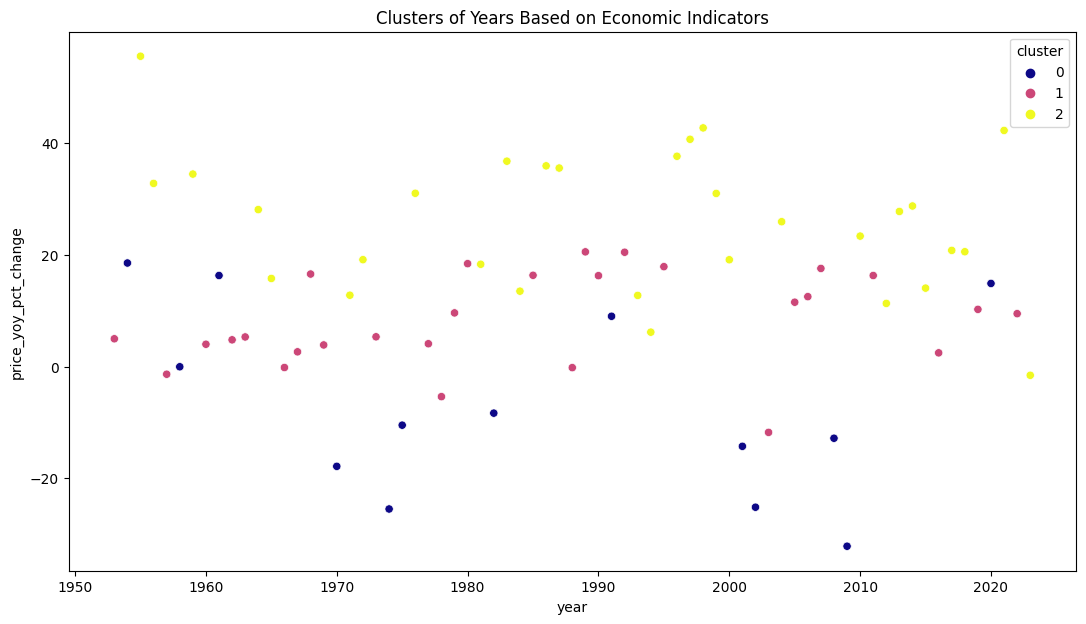

In [20]:
# Visualize the clusters
# Where I got Hue info: https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html
# Where I got plotting info: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.figure(figsize=(13, 7)) 
sns.scatterplot(x='year', 
                y='price_yoy_pct_change', 
                hue='cluster', 
                data=unsupervised_economic_data_for_modeling, 
                palette='plasma')
plt.title('Clusters of Years Based on Economic Indicators')
plt.show()

From the visual above we can see that the clusters identified what look to be three sort of moods of the economy. Cluster 0 looks to be a pretty bad economy. Cluster 1 looks the be avergae good economy. And cluster 2 appears to be a good economy. These are all mapped against the S&P 500 price change over time. I want to confirm this by looking at the means of each row. And it will be good to visualize this. I also removed volume as it is unlike the other economic indicators and our SME says it should be removed. 

In [21]:
# Calculate mean values of features for each cluster
cluster_means = unsupervised_economic_data_for_modeling[features + ['cluster']].groupby('cluster').mean()
cluster_means

,price_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change
cluster,,,,
0,-6.779192,45.600103,-6.957453,-0.529298
1,8.295616,-4.479082,-4.658681,3.920817
2,25.783857,-7.769232,7.603798,3.720159


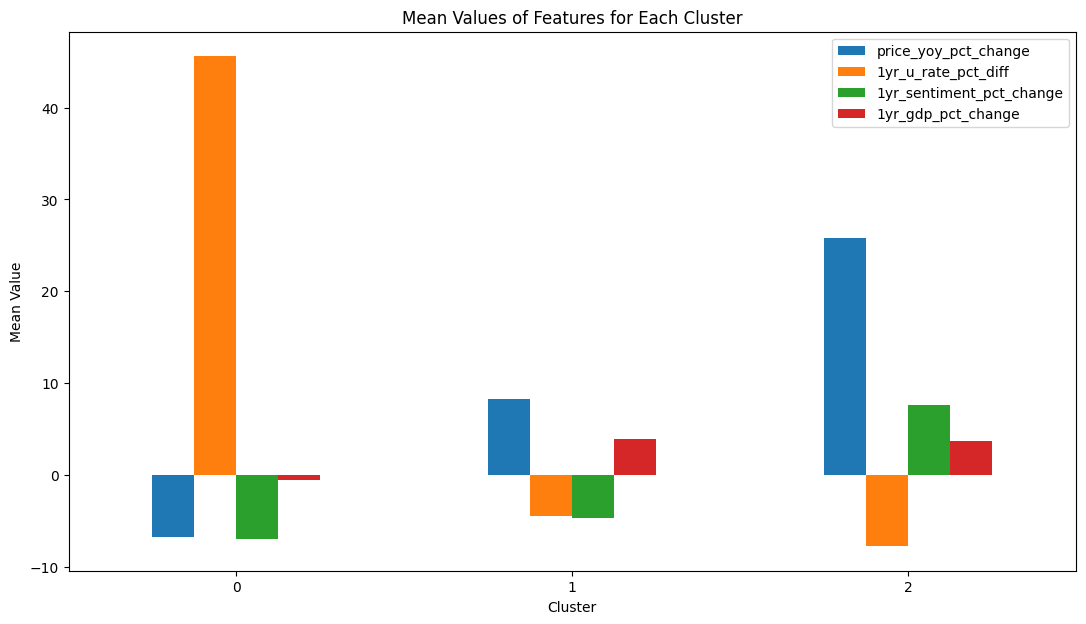

In [22]:
# Plotting
cluster_means.plot(kind='bar', figsize=(13, 7))
plt.title('Mean Values of Features for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()

Above is also a confirmation of what was seen in the original clustering, I now want to rename the columns so they match the findings. Adding that to the above visual will make the visual a lot stronger. 

In [23]:
# Apply the new labels to the 'cluster' column
unsupervised_economic_data_for_modeling['economy_label'] = unsupervised_economic_data_for_modeling['cluster'].map({
    0: 'Bad Economy',  
    1: 'Average Economy', 
    2: 'Good Economy'  
})
unsupervised_economic_data_for_modeling

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,action,cluster,economy_label
2,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,buy,1,Average Economy
3,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,buy,0,Bad Economy
4,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,buy,2,Good Economy
5,1956,32.815013,-13.784416,-5.064776,1.221581,3.216954,sell,2,Good Economy
6,1957,-1.380315,1.127496,4.334827,-11.196782,3.049756,sell,1,Average Economy
...,...,...,...,...,...,...,...,...,...
68,2019,10.242900,5.918325,-5.549916,-2.422907,1.851285,buy,1,Average Economy
69,2020,14.889219,38.676798,121.924519,-15.046015,1.226555,buy,0,Bad Economy
70,2021,42.304832,8.150914,-17.346642,-4.813490,1.572607,hold,2,Good Economy
71,2022,9.473566,5.095595,-30.502669,-24.017608,3.565082,sell,1,Average Economy


In [24]:
labeled_means = unsupervised_economic_data_for_modeling[['price_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change','economy_label']].groupby('economy_label').mean()
labeled_means

,price_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change
economy_label,,,,
Average Economy,8.295616,-4.479082,-4.658681,3.920817
Bad Economy,-6.779192,45.600103,-6.957453,-0.529298
Good Economy,25.783857,-7.769232,7.603798,3.720159


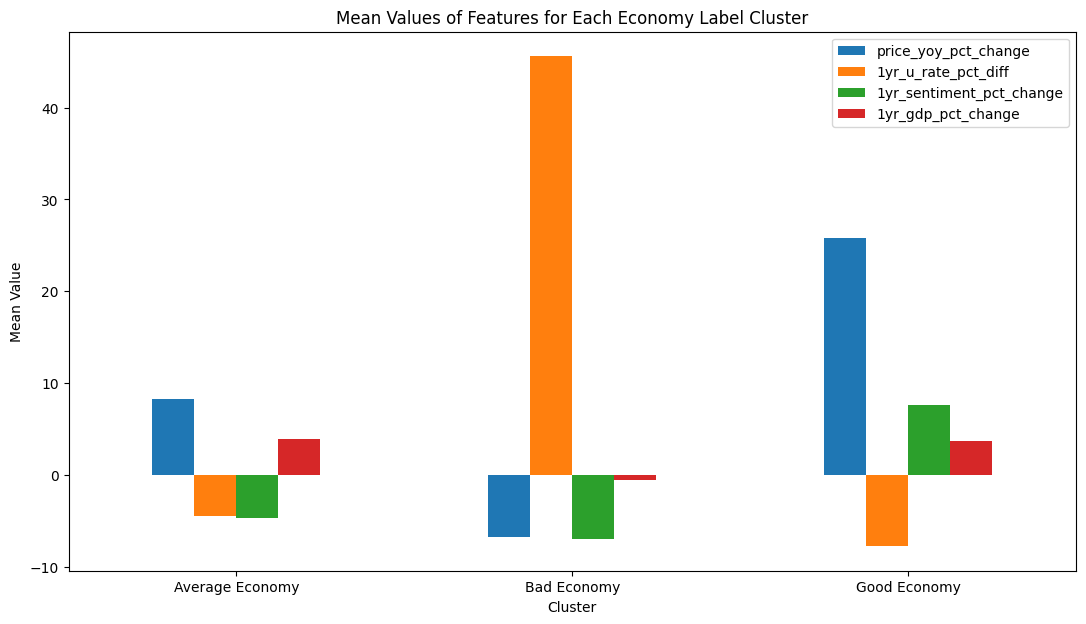

In [25]:
# Plotting
labeled_means.plot(kind='bar', figsize=(13, 7))
plt.title('Mean Values of Features for Each Economy Label Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()

Prep the data for the rest of the team to create further visuals on. 

In [26]:
economic_data_with_economy_label = unsupervised_economic_data_for_modeling[['year', 'price_yoy_pct_change', 'volume_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change','economy_label',
       'action']]
economic_data_with_economy_label = economic_data_with_economy_label.reset_index(drop=True)
economic_data_with_economy_label

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,economy_label,action
0,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,Average Economy,buy
1,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,Bad Economy,buy
2,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,Good Economy,buy
3,1956,32.815013,-13.784416,-5.064776,1.221581,3.216954,Good Economy,sell
4,1957,-1.380315,1.127496,4.334827,-11.196782,3.049756,Average Economy,sell
...,...,...,...,...,...,...,...,...
66,2019,10.242900,5.918325,-5.549916,-2.422907,1.851285,Average Economy,buy
67,2020,14.889219,38.676798,121.924519,-15.046015,1.226555,Bad Economy,buy
68,2021,42.304832,8.150914,-17.346642,-4.813490,1.572607,Good Economy,hold
69,2022,9.473566,5.095595,-30.502669,-24.017608,3.565082,Average Economy,sell


# Supervised Learning Portion

## Prep The Data

In [27]:
# Create a copy just for this
supervised_learning_data = economic_data_with_economy_label.copy()

In [28]:
# One hot encoding for the string categories
label_encoder = LabelEncoder()
supervised_learning_data['economy_label_encoded'] = label_encoder.fit_transform(supervised_learning_data['economy_label'])
supervised_learning_data['action_encoded'] = label_encoder.fit_transform(supervised_learning_data['action'])

In [29]:
# Do the train test split
X = supervised_learning_data[['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
            '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label_encoded']]
y = supervised_learning_data['action_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# View the encodings (helpful when writing the paper)
for original_encoding, new_encoding in dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))).items():
    print(f"{original_encoding} - {new_encoding}")

buy - 0
hold - 1
sell - 2


# Logistic Regression

### Model Building

In [32]:
log_reg_model = LogisticRegression(random_state=42)

# In order to get full use of limited data I will do a cross validation 
log_reg_scores = cross_val_score(log_reg_model, 
                                 X_train_scaled, 
                                 y_train, 
                                 cv=5)

print(f'Accuracy: {log_reg_scores.mean()}')

# Now fit the model
log_reg_model.fit(X_train_scaled, y_train)

Accuracy: 0.6075757575757575


LogisticRegression(random_state=42)

### Evaluation

In [33]:
# Try the prediction on novel data
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Classification Report
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         4

    accuracy                           0.67        15
   macro avg       0.41      0.43      0.42        15
weighted avg       0.62      0.67      0.64        15



67% is very good and surprising, this is a good sign

## Failure Analysis

In [34]:
# Create a DataFrame to view the incorrect predictions
failure_analysis = pd.DataFrame({
    'The Correct Label': y_test,
    'The Predicted Label': y_pred_log_reg
}, index=X_test.index)

# Build a df of just the incorrect ones and bring in the other X test for feature analysis on these failures
failure_analysis = failure_analysis[y_test != y_pred_log_reg]
failure_analysis.join(X_test).reset_index(drop=True)

,The Correct Label,The Predicted Label,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,economy_label_encoded
0,2,0,-25.211359,31.366107,23.195564,0.382856,1.337259,1
1,2,0,-1.380315,1.127496,4.334827,-11.196782,3.049756,0
2,0,2,31.019421,42.146540,-6.258542,1.155010,4.816337,2
3,0,2,13.503616,15.153426,-21.456091,11.548732,8.578045,2
4,1,0,4.783025,9.783433,-16.566826,1.488174,7.569161,0


### Feature Coefficients

In [35]:
# Feature importance
log_reg_coef = pd.DataFrame({
    'Parameter': ['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
            '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label_encoded'],
    'Coeff': log_reg_model.coef_[0]
})

# Look at the df
log_reg_coef['Absolute Coeff'] = np.abs(log_reg_coef['Coeff'])
log_reg_coef

,Parameter,Coeff,Absolute Coeff
0,price_yoy_pct_change,0.249030,0.249030
1,volume_yoy_pct_change,-0.263787,0.263787
2,1yr_u_rate_pct_diff,0.646561,0.646561
3,1yr_sentiment_pct_change,0.489938,0.489938
4,1yr_gdp_pct_change,-0.081007,0.081007
5,economy_label_encoded,-0.405590,0.405590


## Decision Tree

### Model Building

In [36]:
tree_model = DecisionTreeClassifier(random_state=42)

# Cross-validation model build and check accuracy
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=5)
print(f'Accuracy: {tree_scores.mean()}')
tree_model.fit(X_train_scaled, y_train)

Accuracy: 0.39090909090909093


DecisionTreeClassifier(random_state=42)

### Evaluation

In [37]:
# Predict
y_pred_tree = tree_model.predict(X_test_scaled)

# Classification Report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.00      0.00      0.00         1
           2       0.14      0.25      0.18         4

    accuracy                           0.40        15
   macro avg       0.26      0.25      0.25        15
weighted avg       0.45      0.40      0.42        15



The decision tree did not do as well. 

### Feature Importance

In [38]:
# Feature importance for Decision Tree
tree_importance = pd.DataFrame({
    'Feature': ['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
            '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label_encoded'],
    'feature_importance': tree_model.feature_importances_
})

tree_importance

,Feature,feature_importance
0,price_yoy_pct_change,0.166200
1,volume_yoy_pct_change,0.033613
2,1yr_u_rate_pct_diff,0.380792
3,1yr_sentiment_pct_change,0.147841
4,1yr_gdp_pct_change,0.271553
5,economy_label_encoded,0.000000


## Random Forest

### Model Building

In [39]:
# Initialize Random Forest
forest_model = RandomForestClassifier(random_state=42)

# Cross Validation as we have been doing
forest_scores = cross_val_score(forest_model, X_train_scaled, y_train, cv=5)
print(f'Random Forest Accuracy: {forest_scores.mean()}')
forest_model.fit(X_train_scaled, y_train)

Random Forest Accuracy: 0.5712121212121212


RandomForestClassifier(random_state=42)

### Evaluation

In [40]:
# Predict
y_pred_forest = forest_model.predict(X_test_scaled)

# Classification Report
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.00      0.00      0.00         1
           2       0.33      0.25      0.29         4

    accuracy                           0.67        15
   macro avg       0.36      0.38      0.37        15
weighted avg       0.59      0.67      0.62        15



### Feature Importance

In [41]:
# Feature importance for Random Forest
forest_feature_importance = pd.DataFrame({
    'Feature': ['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
            '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label_encoded'],
    'feature_importance': forest_model.feature_importances_
})
forest_feature_importance

,Feature,feature_importance
0,price_yoy_pct_change,0.185924
1,volume_yoy_pct_change,0.177819
2,1yr_u_rate_pct_diff,0.225794
3,1yr_sentiment_pct_change,0.220501
4,1yr_gdp_pct_change,0.166871
5,economy_label_encoded,0.023091


# Visualization of Feature Importance

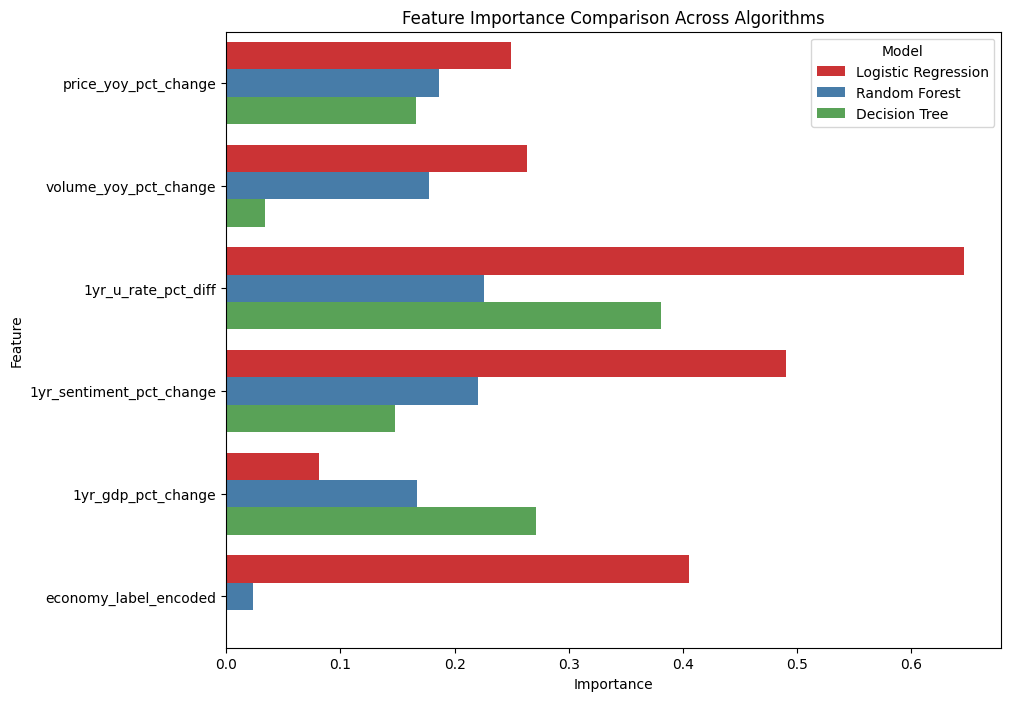

In [42]:

log_reg_coef = pd.DataFrame({
    'Feature': ['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
            '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label_encoded'],
    'Importance': log_reg_model.coef_[0],
    'Model': 'Logistic Regression'})



forest_importance = pd.DataFrame({
    'Feature': ['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
            '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label_encoded'],
    'Importance': forest_model.feature_importances_,
    'Model': 'Random Forest'})

tree_importance = pd.DataFrame({
    'Feature': ['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
            '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label_encoded'],
    'Importance': tree_model.feature_importances_,
    'Model': 'Decision Tree'})

feature_importances = pd.concat([log_reg_coef, forest_importance, tree_importance])

feature_importances.loc[feature_importances['Model'] == 'Logistic Regression', 'Importance'] = feature_importances.loc[feature_importances['Model'] == 'Logistic Regression', 'Importance'].abs()

plt.figure(figsize=(10, 8))
palette = sns.color_palette("Set1")
sns.barplot(x='Importance', y='Feature', hue='Model', data=feature_importances, palette=palette)
plt.title('Feature Importance Comparison Across Algorithms')
plt.show()